# Not Hotdog

---

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(1)

%load_ext autoreload
%autoreload 2
%aimport utils

_(many functions were placed in `utils.py` in order to make the code cleaner and I will import them directly from that file)_

## Data loading and image representation

In [16]:
from PIL import Image

data_folder = "./data/"

path = data_folder + "hot_dog/893996.jpg"

# read image
image = Image.open(path)

# resize image
height = 299
width = 299
image = image.resize((height, width))

# transform the image to array
image = np.array(image)

This returns the image as 3-dimensional numpy matrix, containing the value of intensity of every pixel in each row, column and color channel.

In [17]:
image.shape

(299, 299, 3)

We can visualize the loaded image using

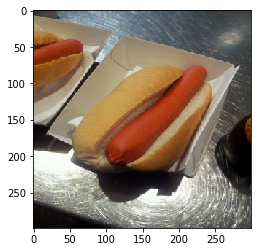

In [18]:
plt.figure(figsize=(4,4))
plt.imshow(image)

Note that the 3rd dimension of our image objects is the pixel intensity. This is divided into 3 **color channels**: those belonging to the red (R), green (G) and blue (B) intensities (**RGB** scheme). Each of these intensities ranges from 0 to 255, since these are 24-bit images: each of the 3 colors is represented by 8 bits, so they can range from 0 (all 8 bits set to 0) to 255 (all 8 bits set to 1).

These constants are defined inside the function `image_to_rgb` inside `utils`.

When R, G and B are all zero, the pixel is totally black. When they are all 255, the pixel is totally white. Pure red is (255, 0, 0), pure green (0, 255, 0) and pure blue (0, 0, 255). Intermediate colors have intermediate values, according to what the specific pixel is. For example, let us manipulate the colors of the previous image:

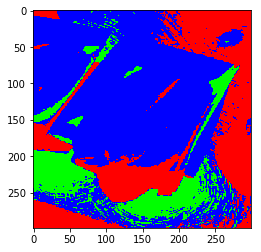

In [19]:
from utils import image_to_rgb

image2 = image_to_rgb(image)

# Plot result
plt.figure(figsize=(4,4))
plt.imshow(image2)

### Read images and resize them

I create a function inside `utils` to read images from a given path and resize them to have the every image on the dataset with the same width and height.

Use the defined `read_images_from_path` function to read and resize all training and test images.

In [20]:
from utils import read_images_from_path

# define paths
img_hot_dog_path = data_folder + 'hot_dog'
img_not_hot_dog_path = data_folder + 'not_hot_dog'

# get images
img_hot_dog = read_images_from_path(img_hot_dog_path, height, width)
img_not_hot_dog = read_images_from_path(img_not_hot_dog_path, height, width)

Getting images from path: ./data/hot_dog...
Getting images from path: ./data/not_hot_dog...


Create `X_train`, `Y_train`, `X_test` and `Y_test` partitions.

In [21]:
from sklearn.model_selection import train_test_split

test_split_size = 0.2

img_hot_dog_train, img_hot_dog_test, \
tag_hot_dog_train, tag_hot_dog_test = train_test_split(img_hot_dog,
                                                       len(img_hot_dog) * [0],
                                                       test_size=test_split_size,
                                                       random_state=1)

img_not_hot_dog_train, img_not_hot_dog_test, \
tag_not_hot_dog_train, tag_not_hot_dog_test = train_test_split(img_not_hot_dog,
                                                               len(img_not_hot_dog) * [1],
                                                               test_size=test_split_size,
                                                               random_state=1)

In [22]:
X_train = np.asarray(img_hot_dog_train + img_not_hot_dog_train)
Y_train = np.asarray(tag_hot_dog_train + tag_not_hot_dog_train)

X_test = np.asarray(img_hot_dog_test + img_not_hot_dog_test)
Y_test = np.asarray(tag_hot_dog_test + tag_not_hot_dog_test)

#print(X_train[0].shape)
#print(Y_train)

If everything has been properly loaded both X_train and Y_train lists should have equal length, and the same should happen for the pair X_test and Y_test.

In [23]:
print("X_train size", len(X_train))
print("Y_train size", len(Y_train))
print("X_test size", len(X_test))
print("Y_test size", len(Y_test))

class_names = ['Hot dog', 'Not hot dog']

X_train size 768
Y_train size 768
X_test size 193
Y_test size 193


Show some **Hot dog** images:

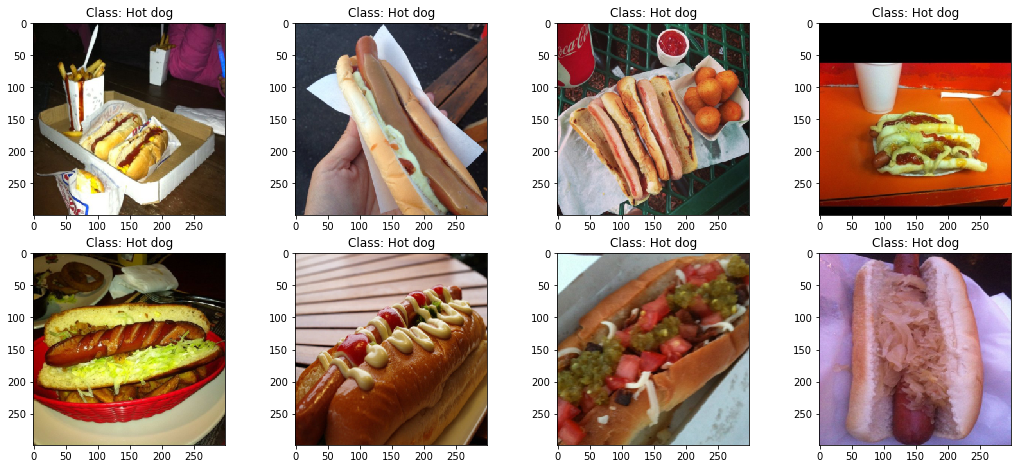

In [24]:
plt.figure(figsize=(18, 12))

for i in range(0, 8):
    image_index = i
    Y_test_binary = Y_train[image_index]

    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[image_index])
    plt.title('Class: {}'.format(class_names[Y_test_binary]))
    
# show the plot
plt.show()

Show some **Not hot dog** images:

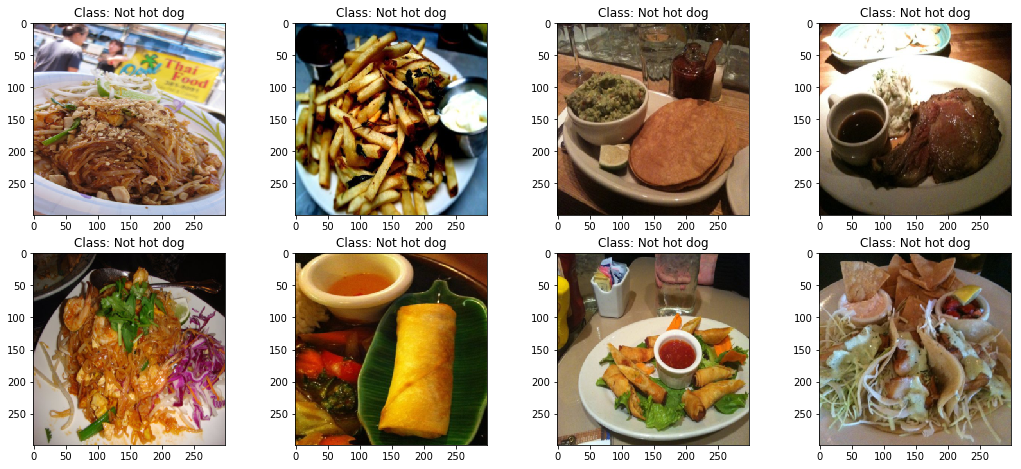

In [25]:
plt.figure(figsize=(18, 12))

for i in range(0, 8):
    image_index = i + len(img_hot_dog_train)
    Y_test_binary = Y_train[image_index]

    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[image_index])
    plt.title('Class: {}'.format(class_names[Y_test_binary]))
    
# show the plot
plt.show()

## Data preprocessing

For efficiency in batch processing, in keras all input patterns should have equal dimensions. Even more, when working with images keras expects as training input a 4-dimensional matrix with dimensions (patterns, image_width, image_height, color_channels). Therefore, you must preprocess the data into this format. It is also highly recommended to rescale the pixel values to make them lie in the range [0,1]. Finally, you might also need to perform some transformation on the outputs Y.

In [26]:
from keras.utils import np_utils

# images are already resized to 30x40 pixels

# normalize data: rescale pixel values to the range [0,1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# we should change the class encoding to something more akin to neural networks,
# instead of having a single integer ranging [0,1] to encode the different classes,
# we will use a one-hot vector encoder to codify that 2 classes
n_classes = 2

Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)

In [27]:
# preprocess the data into [patterns, image_width, image_height, color_channels] format
color_channels = X_train.shape[3]
train_patterns = X_train.shape[0]
test_patterns = X_test.shape[0]

train_tensor = X_train.reshape(train_patterns, width, height, color_channels)
test_tensor = X_test.reshape(test_patterns, width, height, color_channels)

print('train_tensor.shape: {}'.format(train_tensor.shape))
print('Y_train.shape: {}'.format(Y_train.shape))

print('test_tensor.shape: {}'.format(test_tensor.shape))
print('Y_test.shape: {}'.format(Y_test.shape))

train_tensor.shape: (768, 299, 299, 3)
Y_train.shape: (768, 2)
test_tensor.shape: (193, 299, 299, 3)
Y_test.shape: (193, 2)


## Deep model

Create a deep network that solves the classification problem using the layers that seem fit for problem.

### Convolutional network configuration

In [28]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D, Convolution2D, MaxPooling2D
from keras.optimizers import Adam

def build_model():
    model = Sequential()

    model.add(Convolution2D(32, (3, 3),
                            input_shape=(width, height, color_channels),
                            activation='relu'))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #model.add(Convolution2D(64, (3, 3), activation='relu'))
    #model.add(Convolution2D(64, (3, 3), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))

    #model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))

    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=0.0001),
                  metrics=['accuracy'])

    return model

In [35]:
####### PRETRAINED FINE TUNNING
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model


def build_model():
    base_model = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(width, height, color_channels))

    for layer in base_model.layers:
        layer.trainable = False

        
    x = GlobalAveragePooling2D()(base_model.output)

    predictions = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=0.0001),
                  metrics=['accuracy'])

    return model

In [36]:
import numpy as np
np.random.seed(1) # for reproducibility

model = build_model()

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_377 (Conv2D)             (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_377 (BatchN (None, 149, 149, 32) 96          conv2d_377[0][0]                 
__________________________________________________________________________________________________
activation_377 (Activation)     (None, 149, 149, 32) 0           batch_normalization_377[0][0]    
__________________________________________________________________________________________________
conv2d_378

In [ ]:
%%time

epochs = 25
batch_size = 32

model_history = model.fit(
    train_tensor,
    Y_train,
    steps_per_epoch = len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(test_tensor, Y_test),
    validation_steps = len(X_test) // batch_size,
    verbose=1
)

Train on 768 samples, validate on 193 samples
Epoch 1/25


In [ ]:
from utils import plot_loss_and_accuracy

score = model.evaluate(test_tensor, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

plot_loss_and_accuracy(model_history)

In this case adding more epochs ends making the model overfit (increasing the test loss), so I keep 20 epochs.

In [ ]:
#Evaluate the confusion matrix
from sklearn.metrics import confusion_matrix
preds = model.predict_classes(test_tensor)

Y_test_binary = np.argmax(Y_test,axis=1)
confusion_matrix = confusion_matrix(Y_test_binary, preds)

confusion_matrix

### Show some images for which the model fails

Although we've got a pretty good test accuracy, the remaining percentage of images may fail, out model is not 100% effective _–and these models don't exist–_.

In [ ]:
correct_predictions = preds == Y_test_binary
incorrect_images = test_tensor[~correct_predictions]
incorrect_images_index = [i for i, x in enumerate(correct_predictions) if not x]

plt.figure(figsize=(18, 36))
X_batch=[]

for i in range(0, 24):
    plt.subplot(8, 4, i+1)
    plt.imshow(incorrect_images[i])

    incorrect_image_pred_position = incorrect_images_index[i]
    incorrect_image_class = class_names[preds[incorrect_image_pred_position]]
    plt.title('Wrong class: {}'.format(incorrect_image_class))

# show the plot
plt.show()

---